In [2]:
import pandas as pd
import numpy as np

url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


In [3]:
print('Number of rows: '+str(df.shape[0]))

print('Number of North Atlantic Hurricane: '+str(sum(df.BASIN=='NA')))

Number of rows: 716284
Number of North Atlantic Hurricane: 126593


### 1) Get the unique values of the BASIN, SUBBASIN, and NATURE columns

In [4]:
print('Unique Values in Basin:' + str(df.BASIN.unique()))
print('Unique Values in Subbasin:' + str(df.SUBBASIN.unique()))
print('Unique Values in Nature:' + str(df.NATURE.unique()))

Unique Values in Basin:['NI' 'SI' 'NA' 'EP' 'WP' 'SP' 'SA']
Unique Values in Subbasin:['BB' 'AS' 'MM' 'GM' 'NA' 'CS' 'WA' 'EA' 'CP']
Unique Values in Nature:['NR' 'TS' 'ET' 'SS' 'MX' 'DS']


### Rename the WMO_WIND and WMO_PRES columns to WIND and PRES

In [5]:
df=df.rename(columns={'WMO_WIND':'WIND','WMO_PRES':'PRES'})

### 3) Get the 10 largest rows in the dataset by WIND

In [6]:
df.nlargest(10,'WIND')

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
666142,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 12:00:00,TS,17.3,-105.6,185.0,872.0
666140,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 06:00:00,TS,16.5,-105.4,180.0,886.0
666144,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 18:00:00,TS,18.3,-105.3,180.0,878.0
427655,1980214N11330,1980,57,NA,GM,ALLEN,1980-08-07 18:00:00,TS,21.8,-86.4,165.0,899.0
178210,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 00:00:00,TS,24.6,-80.5,160.0,892.0
178211,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 02:00:00,TS,24.8,-80.8,160.0,892.0
178213,1935241N23291,1935,46,NA,GM,NaN,1935-09-03 06:00:00,TS,25.1,-81.1,160.0,NaN
482093,1988253N12306,1988,74,NA,CS,GILBERT,1988-09-14 00:00:00,TS,19.7,-83.8,160.0,888.0
552477,1997253N12255,1997,81,EP,MM,LINDA,1997-09-12 06:00:00,TS,17.1,-109.6,160.0,902.0
605764,2005289N18282,2005,97,NA,CS,WILMA,2005-10-19 12:00:00,TS,17.3,-82.8,160.0,882.0


### Group the data on SID and get the 10 largest hurricanes by WIND

In [7]:
rmnan=df[df['WIND'].notna()]
rmnansid=rmnan.groupby('SID').max()
rmnansid.nlargest(10,'WIND')

,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
SID,,,,,,,,,,,
2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-24 12:00:00,TS,23.2,-94.0,185.0,1007.0
1980214N11330,1980,57,NA,NA,ALLEN,1980-08-11 18:00:00,TS,28.9,-30.0,165.0,1010.0
1935241N23291,1935,46,NA,NA,NaN,1935-09-10 12:00:00,TS,57.0,-31.2,160.0,996.0
1988253N12306,1988,74,NA,NA,GILBERT,1988-09-20 00:00:00,TS,43.4,-54.0,160.0,1008.0
1997253N12255,1997,81,EP,MM,LINDA,1997-09-17 18:00:00,TS,23.5,-104.7,160.0,1007.0
2005289N18282,2005,97,NA,NA,WILMA,2005-10-26 18:00:00,TS,45.5,-52.0,160.0,1004.0
2019236N10314,2019,52,NA,NA,DORIAN,2019-09-09 00:00:00,TS,51.6,-46.4,160.0,1011.0
1998295N12284,1998,89,NA,NA,MITCH,1998-11-09 18:00:00,TS,63.5,-5.0,155.0,1005.0
2005261N21290,2005,80,NA,NA,RITA,2005-09-26 06:00:00,TS,39.5,-69.9,155.0,1009.0


### Make a bar chart of the wind speed of the 20 strongest-wind hurricanes

([<matplotlib.axis.XTick at 0x7fa85367ff90>,
 [Text(0, 0, 'PATRICIA'),
  Text(1, 0, 'ALLEN'),
  Text(2, 0, 'nan'),
  Text(3, 0, 'GILBERT'),
  Text(4, 0, 'LINDA'),
  Text(5, 0, 'WILMA'),
  Text(6, 0, 'DORIAN'),
  Text(7, 0, 'MITCH'),
  Text(8, 0, 'RITA'),
  Text(9, 0, 'RICK'),
  Text(10, 0, 'IRMA'),
  Text(11, 0, 'nan'),
  Text(12, 0, 'JANET'),
  Text(13, 0, 'PATSY'),
  Text(14, 0, 'CAMILLE'),
  Text(15, 0, 'ANITA'),
  Text(16, 0, 'DAVID'),
  Text(17, 0, 'ANDREW'),
  Text(18, 0, 'JOHN'),
  Text(19, 0, 'KATRINA')])

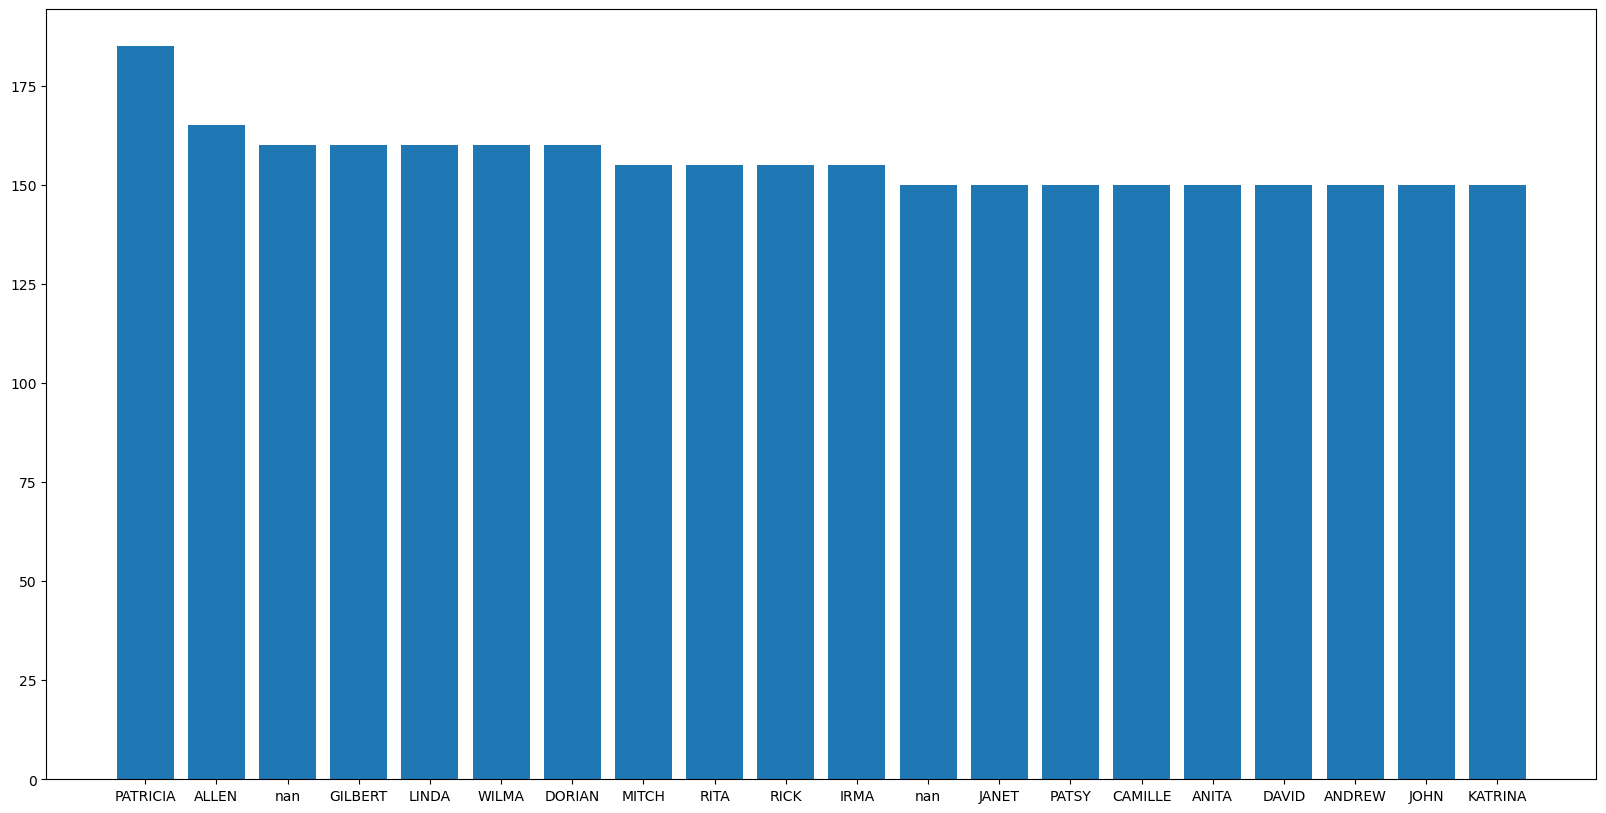

In [8]:
largest20=rmnansid.nlargest(20,'WIND')
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.bar(x=range(len(largest20)),height=largest20.WIND)
plt.xticks(range(len(largest20)),largest20.NAME)

### Plot the count of all datapoints by Basin as a bar chart

<Axes: xlabel='BASIN'>

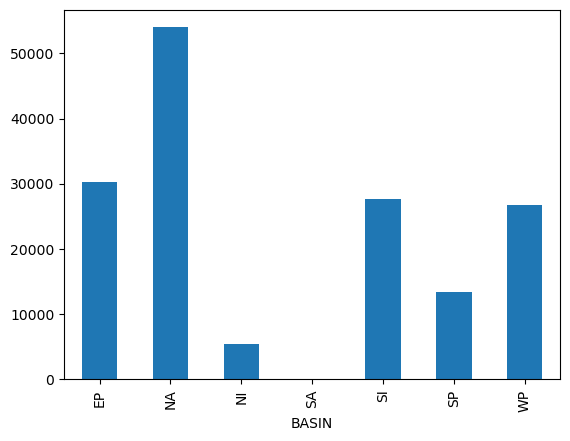

In [9]:
rmnanbasin=rmnan.groupby('BASIN').count()
rmnanbasin['NUMBER'].plot(kind='bar')

### Plot the count of unique hurricanes by Basin as a bar chart.

<Axes: xlabel='BASIN'>

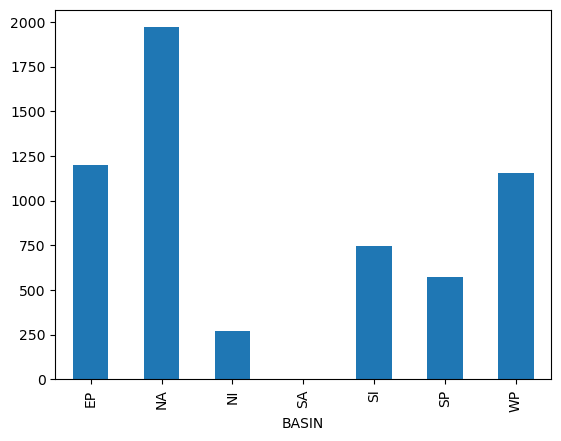

In [10]:
rmnansidmaxcount=rmnan.groupby('SID').max().groupby('BASIN').count()
rmnansidmaxcount
rmnansidmaxcount['NUMBER'].plot(kind='bar')

### Make a hexbin of the location of datapoints in Latitude and Longitude

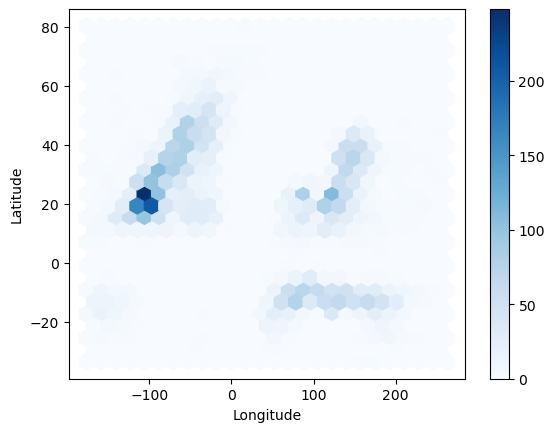

In [11]:

plt.hexbin(y=rmnansid['LAT'], x=rmnansid['LON'],cmap='Blues',gridsize=25)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()



### 9) Find Hurricane Katrina (from 2005) and plot its track as a scatter plot

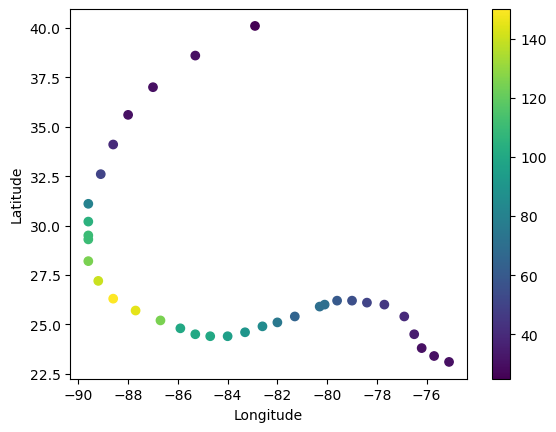

In [12]:
katrina=rmnan[rmnan['NAME']=='KATRINA']
katrina05=katrina[katrina['SEASON']==2005]
s1=plt.scatter(x=katrina05['LON'],y=katrina05['LAT'],c=katrina05['WIND'],cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(s1)

### 10) Make time the index on your dataframe

In [13]:
timeidx=rmnan.set_index('ISO_TIME')

timeidx

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1851-06-25 00:00:00,1851175N26270,1851,5,NA,GM,NaN,TS,27.5333,-94.2667,80.0,NaN
1851-06-25 06:00:00,1851175N26270,1851,5,NA,GM,NaN,TS,27.8000,-95.0800,80.0,NaN
1851-06-25 12:00:00,1851175N26270,1851,5,NA,GM,NaN,TS,27.9000,-95.7333,80.0,NaN
1851-06-25 18:00:00,1851175N26270,1851,5,NA,GM,NaN,TS,28.0333,-96.2667,80.0,NaN
1851-06-25 21:00:00,1851175N26270,1851,5,NA,GM,NaN,TS,28.1333,-96.5667,80.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-10 19:00:00,2022311N21293,2022,46,NA,GM,NICOLE,TS,29.2000,-83.0000,40.0,989.0
2022-11-11 00:00:00,2022311N21293,2022,46,NA,GM,NICOLE,TS,30.1000,-84.0000,35.0,992.0
2022-11-11 06:00:00,2022311N21293,2022,46,NA,NA,NICOLE,TS,31.2000,-84.6000,30.0,996.0


### 11) Plot the count of all datapoints per year as a timeseries

Text(0, 0.5, 'Number of Datapoints')

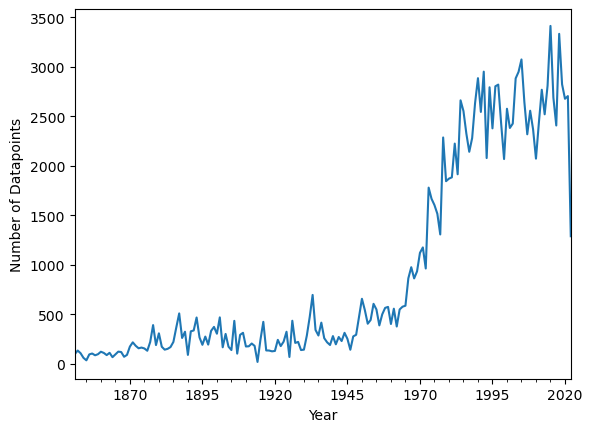

In [14]:
yearidx=timeidx.resample('YE').count()
yearidx['NUMBER'].plot()
plt.xlabel('Year')
plt.ylabel('Number of Datapoints')


### 12) Plot all tracks from the North Atlantic in 2005

Text(0, 0.5, 'Latitude')

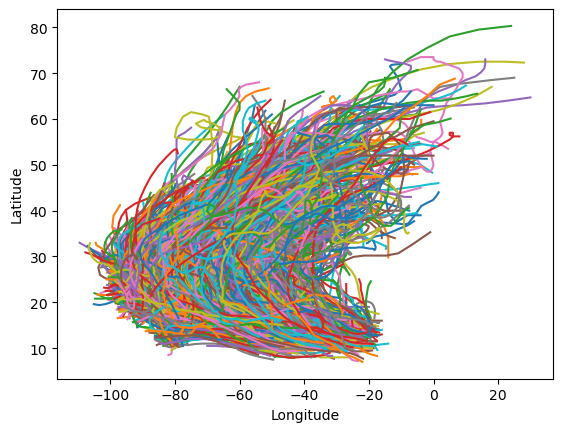

In [15]:
basinsort=timeidx.groupby('BASIN')
NAbasin=basinsort.get_group('NA')
NAbasinSID=NAbasin.groupby('SID')

for grpidx, grp in NAbasinSID:
    plt.plot(grp['LON'],grp['LAT'])

plt.xlabel('Longitude')
plt.ylabel('Latitude')

### Create a filtered dataframe that contains only data since 1970 from the North Atlantic (“NA”) Basin

In [16]:
NAbasinfilter=NAbasin[NAbasin['SEASON']>=1970]
NAbasinfilter

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1970-05-17 18:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.5,-79.0,25.0,NaN
1970-05-18 00:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.8,-79.3,25.0,NaN
1970-05-18 06:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,12.1,-79.7,25.0,NaN
1970-05-18 12:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,12.3,-80.1,25.0,NaN
1970-05-18 18:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,12.6,-80.5,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-10 19:00:00,2022311N21293,2022,46,NA,GM,NICOLE,TS,29.2,-83.0,40.0,989.0
2022-11-11 00:00:00,2022311N21293,2022,46,NA,GM,NICOLE,TS,30.1,-84.0,35.0,992.0
2022-11-11 06:00:00,2022311N21293,2022,46,NA,NA,NICOLE,TS,31.2,-84.6,30.0,996.0


### Plot the number of datapoints per day from this filtered dataframe

Text(0, 0.5, 'Number of Datapoints')

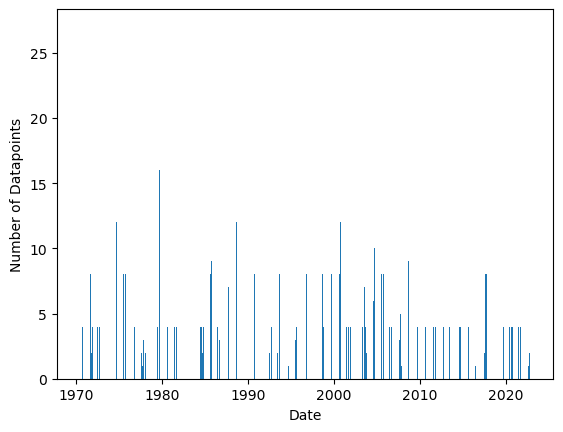

In [17]:
NAbasinfiltertime=NAbasinfilter.resample('D').count()

plt.bar(NAbasinfiltertime.index,NAbasinfiltertime['SEASON'])
plt.xlabel('Date')
plt.ylabel('Number of Datapoints')


### Calculate the climatology of datapoint counts as a function of dayofyear
Plot the mean and standard deviation on a single figure

/tmp/ipykernel_639825/1135343603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NAbasinfilter['Date']=pd.to_datetime(NAbasinfilter.index).date
/tmp/ipykernel_639825/1135343603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NAbasinfilter['DOY'] = pd.to_datetime(NAbasinfilter['Date']).dt.dayofyear
/tmp/ipykernel_639825/1135343603.py:5: FutureWarning: The provided callable <function mean at 0x7fa994e15800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable wil

Text(0, 0.5, 'Precipitation')

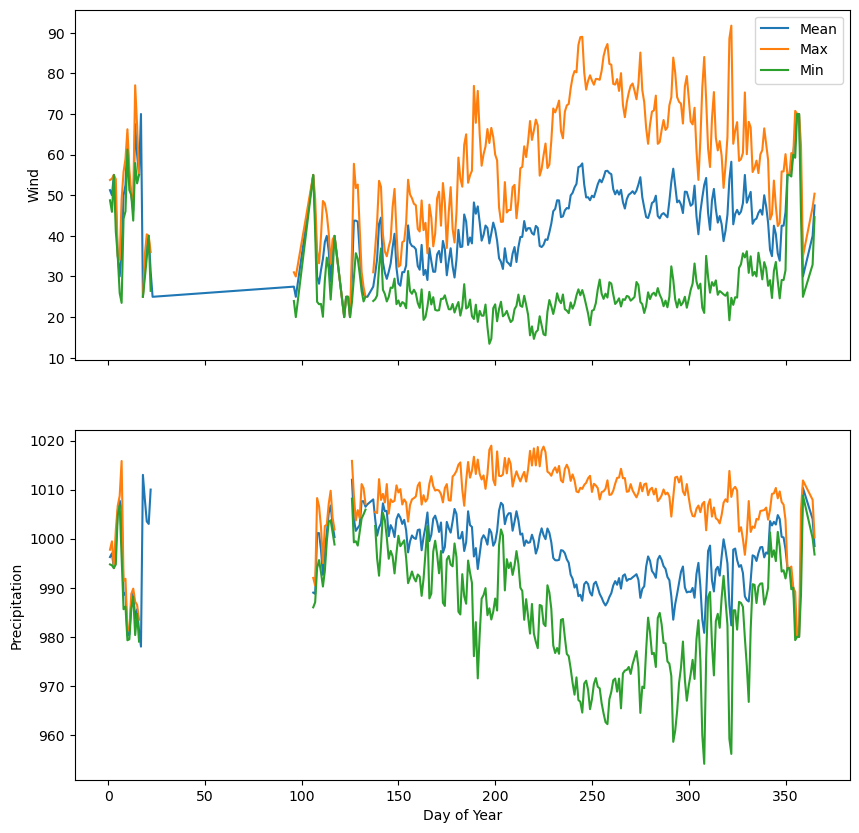

In [18]:

NAbasinfilter['Date']=pd.to_datetime(NAbasinfilter.index).date
NAbasinfilter['DOY'] = pd.to_datetime(NAbasinfilter['Date']).dt.dayofyear

fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,10),sharex=True)
calc=NAbasinfilter.groupby('DOY').agg({'WIND':[np.mean,np.std],'PRES':[np.mean,np.std]})

ax1.plot(calc.index,calc['WIND']['mean'],label='Mean')
ax1.plot(calc.index,calc['WIND']['mean']+calc['WIND']['std'],label='Max')
ax1.plot(calc.index,calc['WIND']['mean']-calc['WIND']['std'],label='Min')
ax1.legend()

ax1.set_ylabel('Wind')
ax2.set_xlabel('Day of Year')

ax2.plot(calc.index,calc['PRES']['mean'],label='Mean')
ax2.plot(calc.index,calc['PRES']['mean']+calc['PRES']['std'],label='Max')
ax2.plot(calc.index,calc['PRES']['mean']-calc['PRES']['std'],label='Min')
ax2.set_ylabel('Precipitation')

### Use transform to calculate the anomaly of daily counts from the climatology
Resample the anomaly timeseries at annual resolution and plot a line with dots as markers.

Which years stand out as having anomalous hurricane activi
y?

Index([1970, 1977, 1978, 1980, 1983, 1987, 1991, 1994, 1995, 1996, 1998, 1999,
       2002, 2004, 2005, 2013, 2017],
      dtype='int32', name='ISO_TIME')


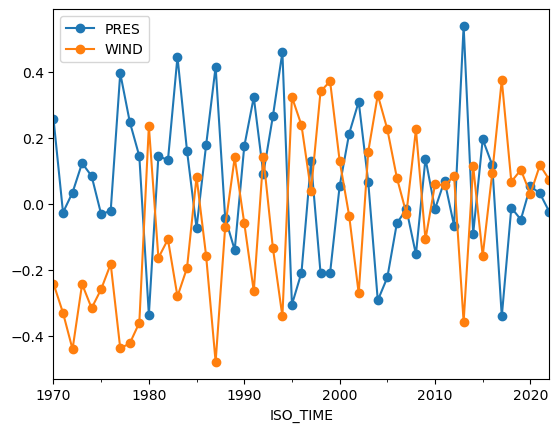

In [70]:
def standardize(x):
    return (x - x.mean())/x.std()
    
wpbasin=NAbasinfilter[['DOY','WIND','PRES']]
wpbasin
p=wpbasin.groupby('DOY').transform(standardize)
q=p.resample('YE').mean()
q.plot(y=['PRES','WIND'],marker='o')


print(q.index[((q['WIND'] > 0.2) | (q['WIND'] < -0.2))&((q['PRES'] > 0.2) | (q['PRES'] < -0.2))].year)

### These are the anomalous years when both wind and pres is above 0.2 or below -0.2.